In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dts


In [88]:
# ---------------------- LOAD DATA ----------------------
ipl = pd.read_excel('/content/ipl_matches.csv.xlsx')
ipl.head()



,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [89]:
ipl.tail()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,IPL-2019,Mumbai,2019-05-05,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,2019-05-07,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,2019-05-08,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,2019-05-10,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,IPL-2019,Hyderabad,2019-05-12,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [90]:
ipl.columns = ipl.columns.str.capitalize()

In [91]:
ipl.head()

,Id,Season,City,Date,Team1,Team2,Toss_winner,Toss_decision,Result,Dl_applied,Winner,Win_by_runs,Win_by_wickets,Player_of_match,Venue,Umpire1,Umpire2,Umpire3
0,1,IPL-2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [92]:
# ---------------------- DATA CLEANING ----------------------
# Drop unnecessary column
ipl = ipl.drop(["Umpire3"], axis=1)


In [93]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Id               756 non-null    int64         
 1   Season           756 non-null    object        
 2   City             749 non-null    object        
 3   Date             756 non-null    datetime64[ns]
 4   Team1            756 non-null    object        
 5   Team2            756 non-null    object        
 6   Toss_winner      756 non-null    object        
 7   Toss_decision    756 non-null    object        
 8   Result           756 non-null    object        
 9   Dl_applied       756 non-null    int64         
 10  Winner           752 non-null    object        
 11  Win_by_runs      756 non-null    int64         
 12  Win_by_wickets   756 non-null    int64         
 13  Player_of_match  752 non-null    object        
 14  Venue            756 non-null    object   

In [94]:
ipl.describe()

,Id,Date,Dl_applied,Win_by_runs,Win_by_wickets
count,756.000000,756,756.000000,756.000000,756.000000
mean,1792.178571,2013-10-07 06:22:51.428571392,0.025132,13.283069,3.350529
min,1.000000,2008-04-18 00:00:00,0.000000,0.000000,0.000000
25%,189.750000,2011-04-16 00:00:00,0.000000,0.000000,0.000000
50%,378.500000,2013-05-09 12:00:00,0.000000,0.000000,4.000000
75%,567.250000,2016-05-18 06:00:00,0.000000,19.000000,6.000000
max,11415.000000,2019-05-12 00:00:00,1.000000,146.000000,10.000000
std,3464.478148,NaN,0.156630,23.471144,3.387963


In [95]:
ipl.isnull().sum()

,0
Id,0
Season,0
City,7
Date,0
Team1,0
Team2,0
Toss_winner,0
Toss_decision,0
Result,0
Dl_applied,0


In [96]:
#fill null values
ipl['City'] = ipl['City'].fillna(ipl['City'].mode()[0])
ipl['Winner'] = ipl['Winner'].fillna(ipl['Winner'].mode()[0])
ipl['Player_of_match'] = ipl['Player_of_match'].fillna(ipl['Player_of_match'].mode()[0])
ipl['Umpire1'] = ipl['Umpire1'].fillna(ipl['Umpire1'].mode()[0])
ipl['Umpire2'] = ipl['Umpire2'].fillna(ipl['Umpire2'].mode()[0])

In [97]:
ipl.isnull().sum()

,0
Id,0
Season,0
City,0
Date,0
Team1,0
Team2,0
Toss_winner,0
Toss_decision,0
Result,0
Dl_applied,0


In [98]:
# Find duplicate rows
duplicates = ipl[ipl.duplicated()]
print(f"Total duplicate rows: {duplicates.shape[0]}")
duplicates.head()

Total duplicate rows: 0


,Id,Season,City,Date,Team1,Team2,Toss_winner,Toss_decision,Result,Dl_applied,Winner,Win_by_runs,Win_by_wickets,Player_of_match,Venue,Umpire1,Umpire2


In [99]:
ipl.shape

(756, 17)

/tmp/ipython-input-1821510027.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ipl, y='Win_by_runs', palette='Set2')


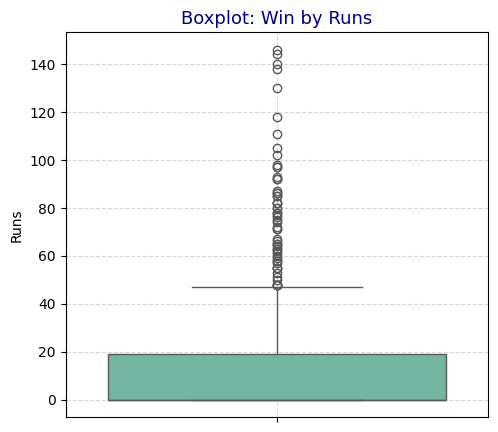

In [100]:
# Boxplot for Win by Runs
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.boxplot(data=ipl, y='Win_by_runs', palette='Set2')
plt.title('Boxplot: Win by Runs', fontsize=13, color='darkblue')
plt.ylabel('Runs')
plt.grid(True, linestyle='--', alpha=0.5)

/tmp/ipython-input-94383016.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ipl, y='Win_by_wickets', palette='Set3')


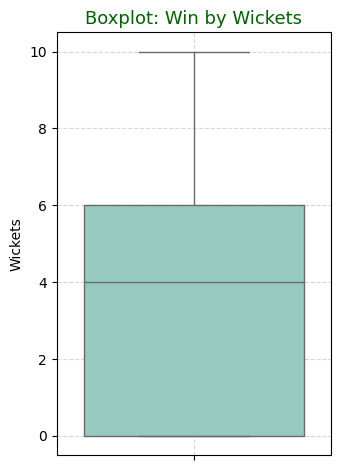

In [101]:
# Boxplot for Win by Wickets
plt.subplot(1, 2, 2)
sns.boxplot(data=ipl, y='Win_by_wickets', palette='Set3')
plt.title('Boxplot: Win by Wickets', fontsize=13, color='darkgreen')
plt.ylabel('Wickets')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2979582323.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Season", data=ipl, palette="coolwarm")


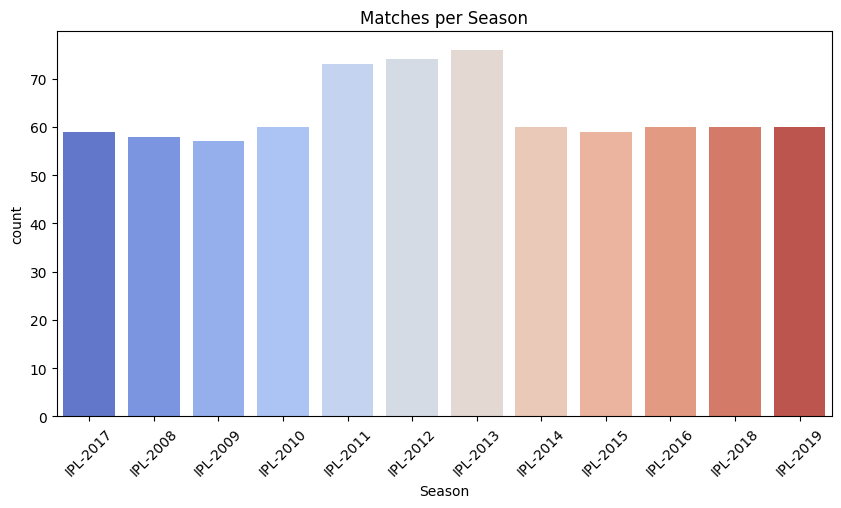

In [102]:
# Univariate Analysis
#Countplot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.countplot(x="Season", data=ipl, palette="coolwarm")
plt.title("Matches per Season")
plt.xticks(rotation=45)
plt.show()

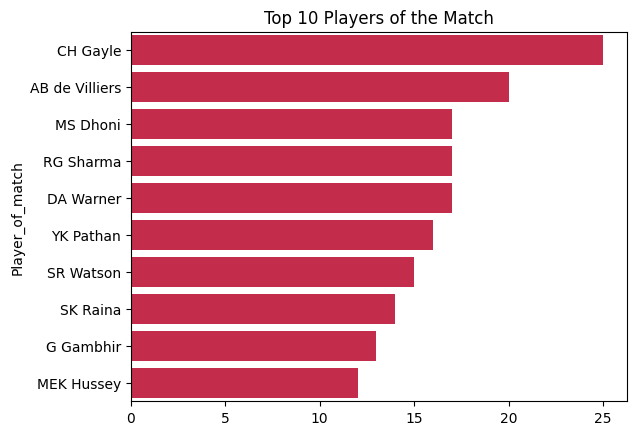

In [103]:
#Barplot
top_players = ipl['Player_of_match'].value_counts().head(10)
sns.barplot(x=top_players.values, y=top_players.index, color="crimson")
plt.title('Top 10 Players of the Match')
plt.show()

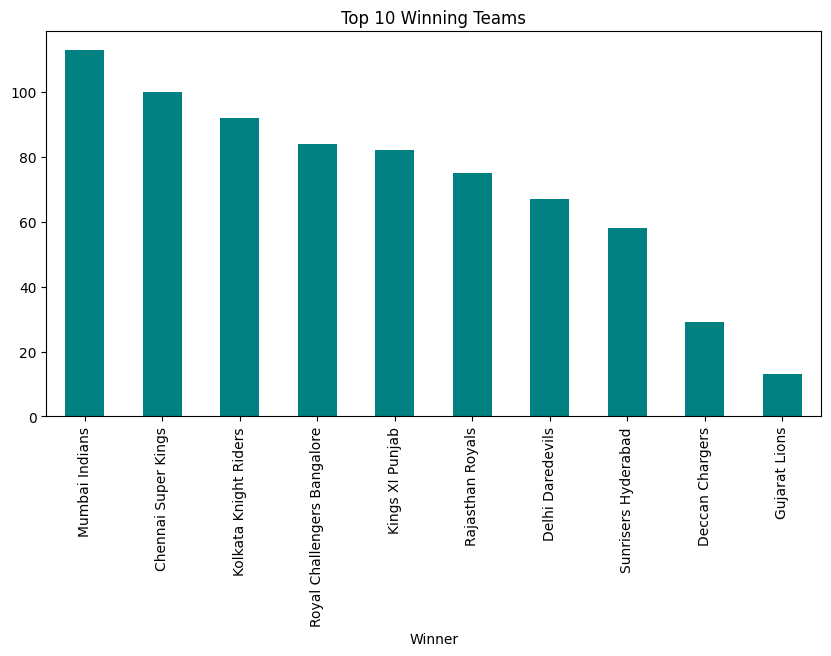

In [104]:
#Barplot
plt.figure(figsize=(10,5))
ipl['Winner'].value_counts().head(10).plot(kind='bar', color="teal")
plt.title("Top 10 Winning Teams")
plt.show()

/tmp/ipython-input-1837839771.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=ipl['Toss_winner'] == ipl['Winner'], palette='Set2')


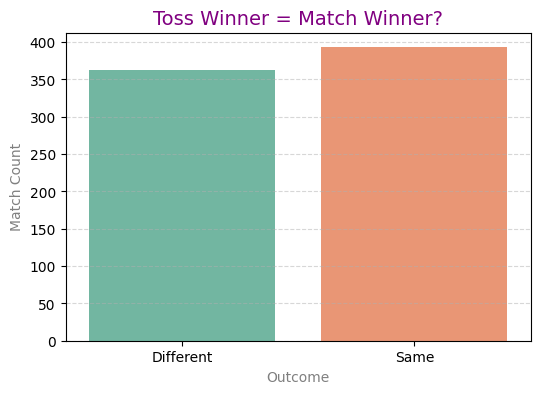

In [105]:
# Bivariate Analysis
#countplot
plt.figure(figsize=(6,4))
sns.countplot(x=ipl['Toss_winner'] == ipl['Winner'], palette='Set2')
plt.xticks([0,1], ['Different', 'Same'])
plt.title('Toss Winner = Match Winner?', fontsize=14, color='purple')
plt.xlabel('Outcome', color='gray')
plt.ylabel('Match Count', color='gray')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

/tmp/ipython-input-176615314.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Toss_decision', y='Win_by_runs', data=ipl, palette="viridis", estimator=np.mean)


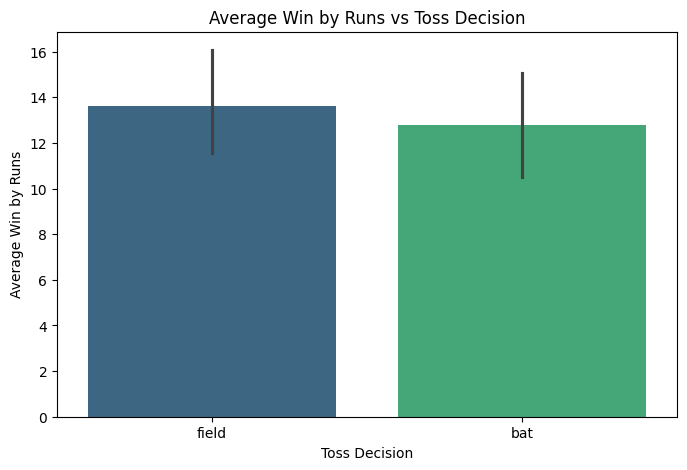

In [106]:
#countplot
plt.figure(figsize=(8,5))
sns.barplot(x='Toss_decision', y='Win_by_runs', data=ipl, palette="viridis", estimator=np.mean)
plt.title("Average Win by Runs vs Toss Decision")
plt.xlabel("Toss Decision")
plt.ylabel("Average Win by Runs")
plt.show()


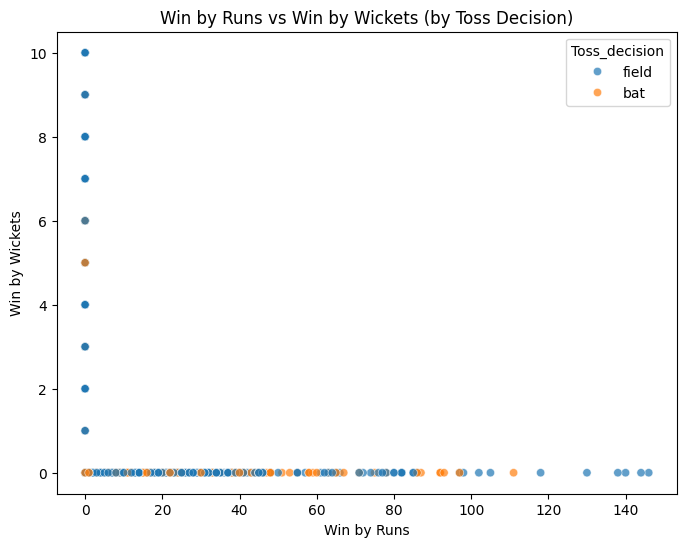

In [107]:
#scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(x='Win_by_runs', y='Win_by_wickets', hue='Toss_decision', data=ipl, alpha=0.7)
plt.title("Win by Runs vs Win by Wickets (by Toss Decision)")
plt.xlabel("Win by Runs")
plt.ylabel("Win by Wickets")
plt.show()


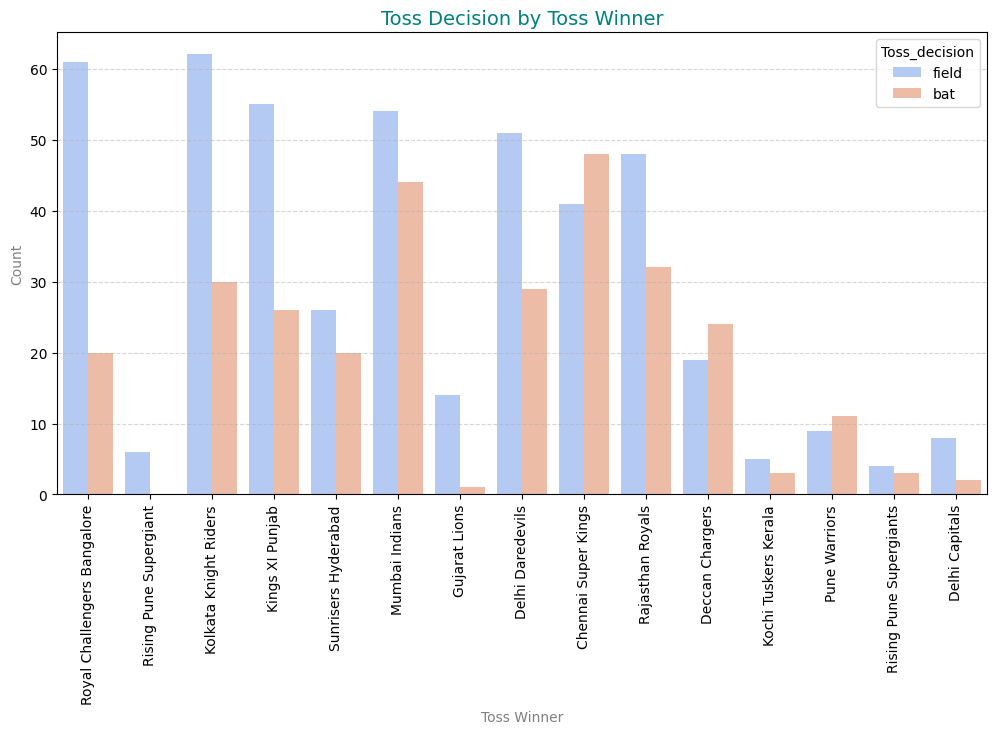

In [108]:
plt.figure(figsize=(12,6))
sns.countplot(data=ipl, x='Toss_winner', hue='Toss_decision', palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Toss Decision by Toss Winner', fontsize=14, color='teal')
plt.xlabel('Toss Winner', color='gray')
plt.ylabel('Count', color='gray')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [109]:
#Create Toss Impact column
ipl['Toss_match_win'] = ipl['Toss_winner'] == ipl['Winner']

<Figure size 1000x600 with 0 Axes>

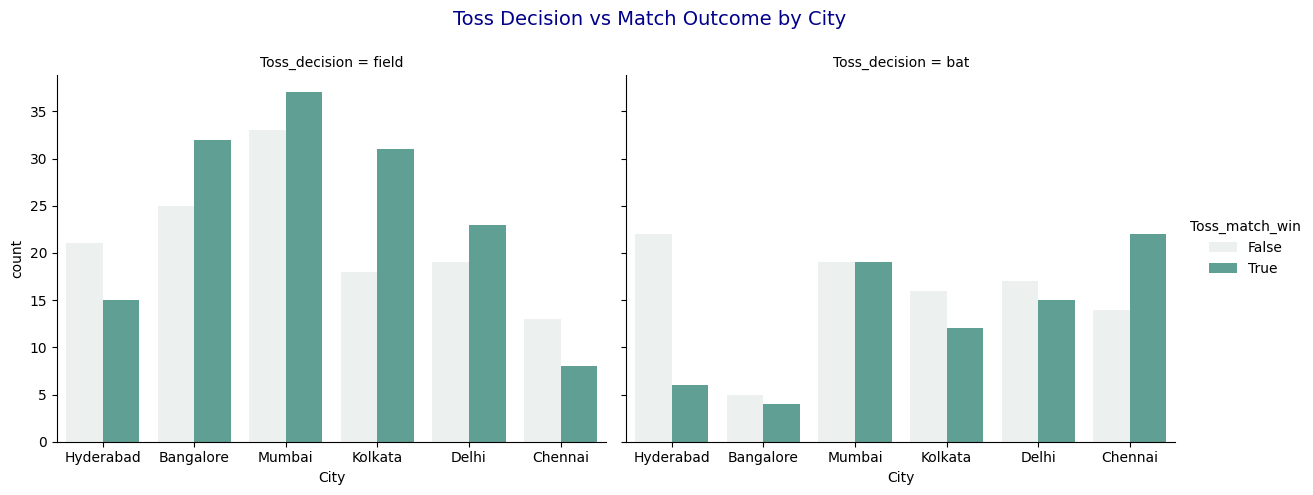

In [110]:
####################################################### Multivariate Analysis
plt.figure(figsize=(10,6))
top_cities = ipl['City'].value_counts().head(6).index
filtered = ipl[ipl['City'].isin(top_cities)].copy()
filtered['Toss_match_win'] = filtered['Toss_winner'] == filtered['Winner']
sns.catplot(data=filtered, x='City', hue='Toss_match_win', col='Toss_decision',
            kind='count', palette='light:#5A9', height=5, aspect=1.2)
plt.subplots_adjust(top=0.85)
plt.suptitle('Toss Decision vs Match Outcome by City', fontsize=14, color='darkblue')
plt.show()

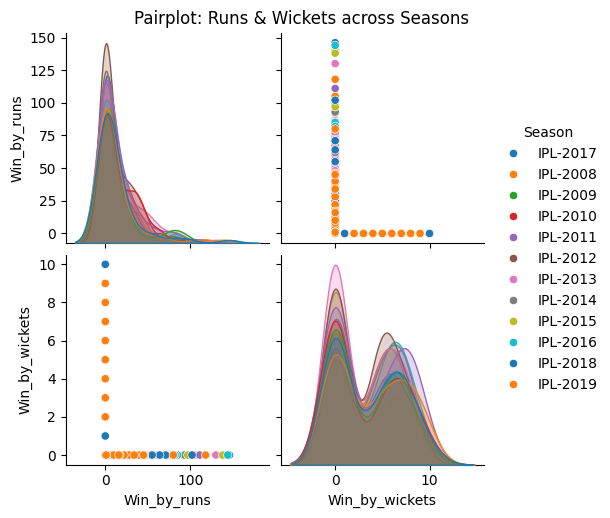

In [111]:
sns.pairplot(ipl[['Win_by_runs','Win_by_wickets','Season']],
             hue='Season', palette="tab10", diag_kind="kde")
plt.suptitle("Pairplot: Runs & Wickets across Seasons", y=1.02)
plt.show()


In [112]:
# Encode Season as numeric for correlation
ipl['Season_encoded'] = ipl['Season'].astype('category').cat.codes

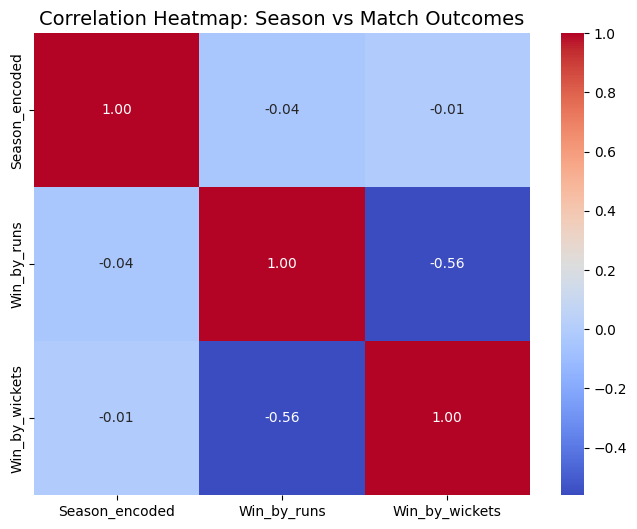

In [113]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(ipl[['Season_encoded','Win_by_runs','Win_by_wickets']].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Season vs Match Outcomes", fontsize=14)
plt.show()

In [114]:
# ---------------------- FEATURE ENGINEERING ----------------------
# 1Encode Toss_decision as numeric
ipl['Toss_decision_encoded'] = ipl['Toss_decision'].map({'bat':1, 'field':0})


In [115]:
# Encode Teams and Toss Winner using Label Encoding
from sklearn.preprocessing import LabelEncoder

le_team1 = LabelEncoder()
le_team2 = LabelEncoder()
le_toss_winner = LabelEncoder()
le_winner = LabelEncoder()
le_season = LabelEncoder()

ipl['Team1_encoded'] = le_team1.fit_transform(ipl['Team1'])
ipl['Team2_encoded'] = le_team2.fit_transform(ipl['Team2'])
ipl['Toss_winner_encoded'] = le_toss_winner.fit_transform(ipl['Toss_winner'])
ipl['Winner_encoded'] = le_winner.fit_transform(ipl['Winner'])
ipl['Season_encoded'] = le_season.fit_transform(ipl['Season'])


In [116]:
# Encode Winner (target variable for classification)
ipl['Winner_encoded'] = le_team.fit_transform(ipl['Winner'])

In [117]:
# Home Team Advantage feature
home_grounds = {
    'Mumbai Indians': 'Wankhede Stadium',
    'Chennai Super Kings': 'MA Chidambaram Stadium',
    'Royal Challengers Bengaluru': 'M Chinnaswamy Stadium',
    'Kolkata Knight Riders': 'Eden Gardens',
    'Delhi Capitals': 'Arun Jaitley Stadium',
    'Sunrisers Hyderabad': 'Rajiv Gandhi International Stadium',
    'Punjab Kings': 'New PCA Stadium',
    'Rajasthan Royals': 'Sawai Mansingh Stadium',
    'Gujarat Titans': 'Narendra Modi Stadium',
    'Lucknow Super Giants': 'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium'
}

def is_home_team(row):
    return int(
        (home_grounds.get(row['Team1'], '') == row['Venue']) or
        (home_grounds.get(row['Team2'], '') == row['Venue'])
    )

ipl['Home_team_advantage'] = ipl.apply(is_home_team, axis=1)


In [118]:
# Convert Toss_match_win to numeric
ipl['Toss_match_win'] = ipl['Toss_match_win'].astype(int)
# Encode Season using Label Encoding
ipl['Season_encoded'] = le_team.fit_transform(ipl['Season'])

In [119]:
# Select features for modeling
feature_cols = ['Team1_encoded','Team2_encoded','Toss_winner_encoded',
                'Toss_decision_encoded','Toss_match_win','Home_team_advantage',
                'Season_encoded']

X = ipl[feature_cols]       # Features
y = ipl['Winner_encoded']   # Target for classification

In [120]:
# Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Feature Engineering Complete! Dataset is ready for ML modeling.")

Feature Engineering Complete! Dataset is ready for ML modeling.


In [121]:
# ---------------------- RANDOM FOREST & XGBOOST PIPELINE ----------------------
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

In [140]:
# ---------------------- RANDOM FOREST ----------------------
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features='sqrt',
    random_state=42
)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
# Store accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)


In [141]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Random Forest Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_rf, average='weighted'))
# Cross-validation
cv_scores_rf = cross_val_score(rf_model, X, y, cv=5)
print(f"Random Forest CV Accuracy: {cv_scores_rf.mean():.2f}")


Random Forest Metrics:
Accuracy: 0.75
F1 Score: 0.7311105935778326
Precision: 0.7274146905725852
Recall: 0.75


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest CV Accuracy: 0.67


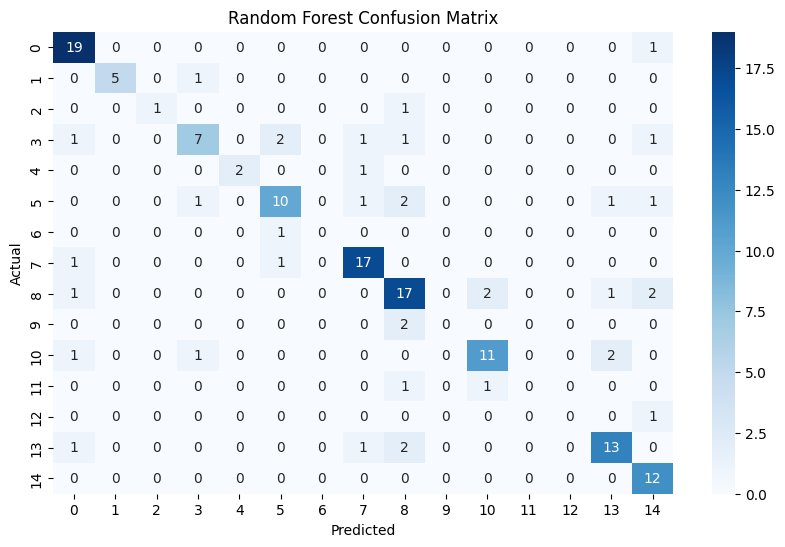

In [124]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10,6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [142]:
# ---------------------- XGBOOST ----------------------
xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1.0,
    random_state=42,
    eval_metric='mlogloss',
    use_label_encoder=False
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
# Store accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:23:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [143]:
print("XGBoost Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb, average='weighted'))
print("Precision:", precision_score(y_test, y_pred_xgb, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_xgb, average='weighted'))
# Cross-validation
cv_scores_xgb = cross_val_score(xgb_model, X, y, cv=5)
print(f"XGBoost CV Accuracy: {cv_scores_xgb.mean():.2f}")


XGBoost Metrics:
Accuracy: 0.9605263157894737
F1 Score: 0.9605231540575886
Precision: 0.9671179149797571
Recall: 0.9605263157894737


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:23:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:23:36] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:23:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:23:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:23:38] WARNING: /w

XGBoost CV Accuracy: 0.89


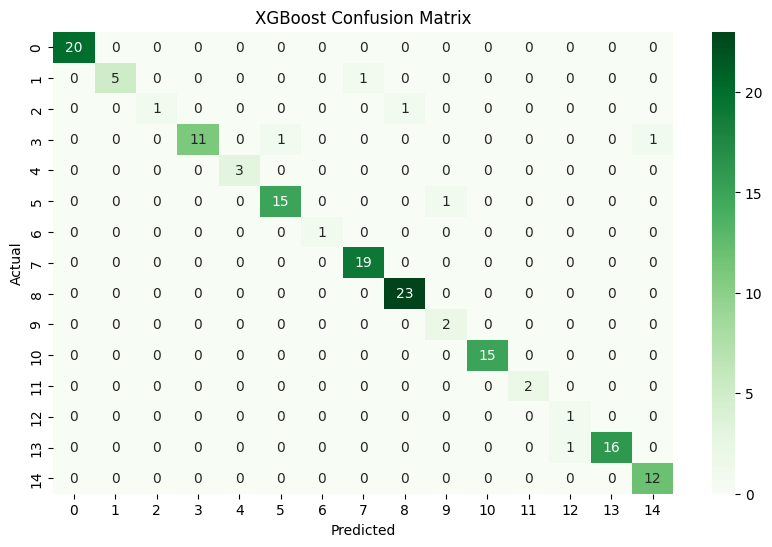

In [127]:
# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(10,6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


/tmp/ipython-input-3566818518.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


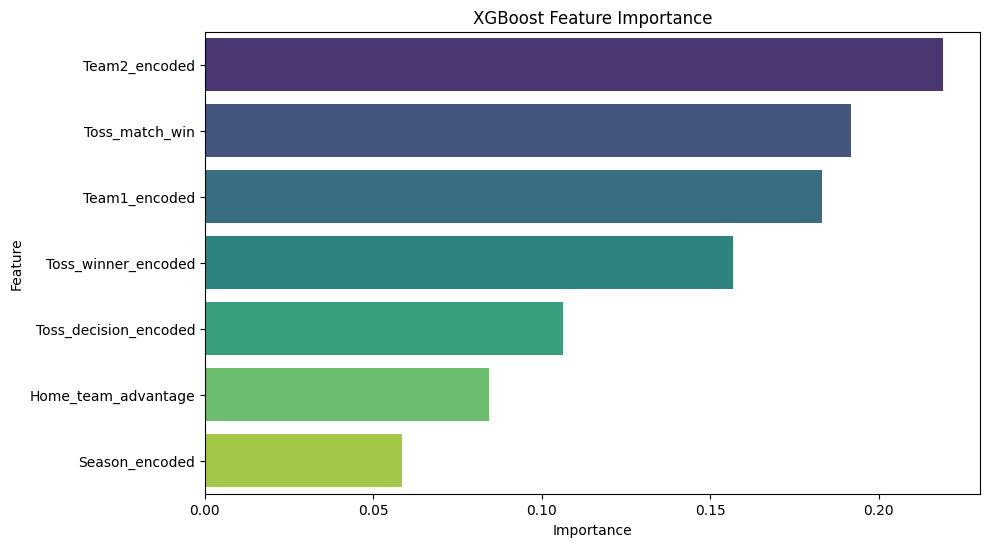

In [128]:
# ---------------------- FEATURE IMPORTANCE (XGBoost) ----------------------
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("XGBoost Feature Importance")
plt.show()

In [129]:
# ---------------------- Logistic Regression ----------------------
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("Logistic Regression Model Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("F1 Score:", f1_score(y_test, y_pred_log, average='weighted'))
print("Precision:", precision_score(y_test, y_pred_log, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_log, average='weighted'))
cv_scores_log = cross_val_score(log_model, X, y, cv=5)
print(f"Logistic Regression CV Accuracy: {cv_scores_log.mean():.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Logistic Regression Model Metrics:
Accuracy: 0.25
F1 Score: 0.23585470593479746
Precision: 0.22895285087719297
Recall: 0.25


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression CV Accuracy: 0.21
Confusion Matrix:
 [[10  0  0  3  0  5  0  1  1  0  0  0  0  0  0]
 [ 2  1  0  2  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 6  0  0  1  0  3  0  1  1  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  1  2  0  0  0  0  0  0]
 [ 0  1  0  2  0  3  0  0  6  0  1  0  0  2  1]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  1  1  0  0  0  5  3  0  3  0  0  3  1]
 [ 3  0  0  0  0  2  0  5  2  0  4  0  0  5  2]
 [ 1  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  2  0  0  0  4  0  1  2  0  3  0  0  3  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  2  0  0  4  0  1  0  0  6  4]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  5  6]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [130]:
# ---------------------- Decision Tree ----------------------
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print("Decision Tree Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt, average='weighted'))
print("Precision:", precision_score(y_test, y_pred_dt, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_dt, average='weighted'))
cv_scores_dt = cross_val_score(dt_model, X, y, cv=5)
print(f"Decision Tree CV Accuracy: {cv_scores_dt.mean():.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree Metrics:
Accuracy: 0.7894736842105263
F1 Score: 0.7910666657886857
Precision: 0.8025888037401195
Recall: 0.7894736842105263
Decision Tree CV Accuracy: 0.71
Confusion Matrix:
 [[18  0  1  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  3  0  1  0  0  0  1  1  0  0  0  0  0  0]
 [ 0  0  1  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0 10  0  1  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  2  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  3  1 11  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  1  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0 18  0  1  0  0  2  1]
 [ 0  0  0  0  0  0  0  0  0  1  1  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  1 11  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 15  1]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  3  8]]


In [131]:
# ---------------------- Support Vector Classifier ----------------------
from sklearn.svm import SVC

svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
print("SVC Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print("F1 Score:", f1_score(y_test, y_pred_svc, average='weighted'))
print("Precision:", precision_score(y_test, y_pred_svc, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_svc, average='weighted'))
cv_scores_svc = cross_val_score(svc_model, X, y, cv=5)
print(f"SVC CV Accuracy: {cv_scores_svc.mean():.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVC Metrics:
Accuracy: 0.34210526315789475
F1 Score: 0.2567873979735435
Precision: 0.30030663780663786
Recall: 0.34210526315789475
SVC CV Accuracy: 0.33
Confusion Matrix:
 [[19  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 5  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 1  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 3  0  0  1  0  3  0  1  4  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  2  0  0  0  0  1  0]
 [ 2  0  0  0  0  1  0  0 10  0  0  0  0  2  1]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  1  0  0  0  1  7  0  0  0  0  6  2]
 [ 4  0  0  1  0  0  0  0 13  0  1  0  0  1  3]
 [ 0  0  0  0  0  0  0  0  2  0  0  0  0  0  0]
 [ 4  0  0  1  0  0  0  1  4  0  1  0  0  3  1]
 [ 0  0  0  0  0  0  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0  9  5]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  5  7]]


In [132]:
# ---------------------- K-Nearest Neighbors ----------------------

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print("KNN Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("F1 Score:", f1_score(y_test, y_pred_knn, average='weighted'))
print("Precision:", precision_score(y_test, y_pred_knn, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_knn, average='weighted'))
cv_scores_knn = cross_val_score(knn_model, X, y, cv=5)
print(f"KNN CV Accuracy: {cv_scores_knn.mean():.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


KNN Metrics:
Accuracy: 0.3618421052631579
F1 Score: 0.3494493947644399
Precision: 0.355085200194389
Recall: 0.3618421052631579
KNN CV Accuracy: 0.37
Confusion Matrix:
 [[15  1  0  0  0  0  0  1  0  0  2  0  0  1  0]
 [ 1  2  0  0  0  0  0  0  1  1  1  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 2  2  0  4  0  1  0  1  2  0  0  0  0  0  1]
 [ 0  0  0  1  1  0  0  0  0  0  0  0  0  1  0]
 [ 0  1  0  1  2  8  0  1  1  0  1  0  0  1  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  2  1  1  2  7  2  0  0  0  0  3  0]
 [ 4  0  0  2  0  0  0  4  6  1  5  0  0  0  1]
 [ 0  0  0  1  0  0  0  0  1  0  0  0  0  0  0]
 [ 3  0  0  3  0  1  0  1  2  1  2  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 2  0  0  1  0  1  0  2  1  0  0  2  0  8  0]
 [ 0  0  0  0  0  1  0  1  1  0  0  0  0  7  2]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


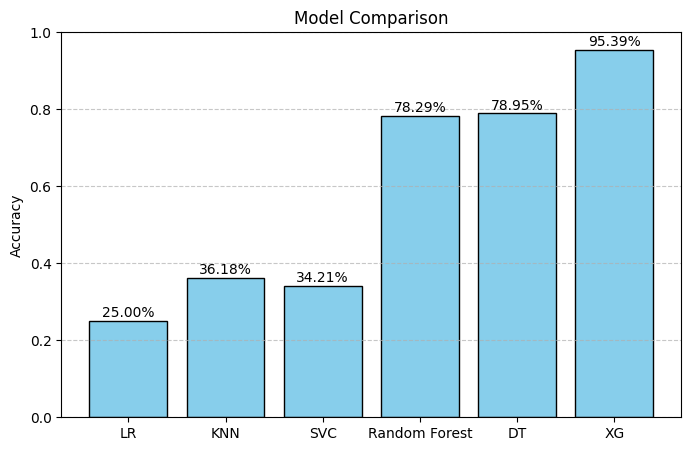

In [139]:
results = {
    "LR": accuracy_score(y_test, y_pred_log),
    "KNN": accuracy_score(y_test, y_pred_knn),
    "SVC": accuracy_score(y_test, y_pred_svc),
    "Random Forest": accuracy_rf,
    "DT": accuracy_score(y_test, y_pred_dt),
    "XG": accuracy_xgb
}
models = list(results.keys())
scores = list(results.values())

plt.figure(figsize=(8,5))
bars = plt.bar(models, scores, color='skyblue', edgecolor='black')
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.ylim(0,1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# add percentage labels on top of bars
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f"{score:.2%}", ha='center', fontsize=10, color='black')
plt.show()


In [138]:
#hyperparameter tuning
# ---------------------- GridSearchCV: XGBoost ----------------------
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_xgb = GridSearchCV(
    estimator=xgb.XGBClassifier(random_state=42, eval_metric='mlogloss', use_label_encoder=False),
    param_grid=param_grid_xgb,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_xgb.fit(X_train, y_train)
print("Best XGB Params:", grid_xgb.best_params_)
print("Best XGB CV Accuracy:", grid_xgb.best_score_)
print("Test Accuracy (XGB):", accuracy_score(y_test, grid_xgb.best_estimator_.predict(X_test)))

Fitting 3 folds for each of 18 candidates, totalling 54 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:16:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGB Params: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Best XGB CV Accuracy: 0.92379685729767
Test Accuracy (XGB): 0.9342105263157895


In [135]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# ---------------------- RandomizedSearchCV: XGBoost ----------------------
param_dist_xgb = {
    'n_estimators': randint(50, 300),       # random integers between 50–300
    'max_depth': randint(3, 10),            # random integers between 3–10
    'learning_rate': uniform(0.01, 0.3),    # uniform distribution between 0.01–0.3
    'subsample': uniform(0.6, 0.4),         # uniform between 0.6–1.0
    'colsample_bytree': uniform(0.6, 0.4)   # uniform between 0.6–1.0
}
rand_xgb = RandomizedSearchCV(
    estimator=xgb.XGBClassifier(random_state=42, eval_metric='mlogloss', use_label_encoder=False),
    param_distributions=param_dist_xgb,
    n_iter=30,              # number of random combinations to try
    cv=3,                   # 3-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42
)
rand_xgb.fit(X_train, y_train)
print("Best Random XGB Params:", rand_xgb.best_params_)
print("Best Random XGB CV Accuracy:", rand_xgb.best_score_)
print("Test Accuracy (Random XGB):", accuracy_score(y_test, rand_xgb.best_estimator_.predict(X_test)))


Fitting 3 folds for each of 30 candidates, totalling 90 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:10:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Random XGB Params: {'colsample_bytree': np.float64(0.8417669517111269), 'learning_rate': np.float64(0.17195232739050195), 'max_depth': 7, 'n_estimators': 85, 'subsample': np.float64(0.9771414282231924)}
Best Random XGB CV Accuracy: 0.9320887312611857
Test Accuracy (Random XGB): 0.9473684210526315


In [136]:
import joblib
joblib.dump(grid_xgb.best_estimator_, 'ipl_predictions_best_model.pkl')

['ipl_predictions_best_model.pkl']